<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/UMAP_DBCAN_SHAP_eGFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ckd/data.csv")

In [17]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation',
       'StartDTTM', 'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic-BP', 'Systolic-BP', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
  

In [22]:
#select columns add columns L1-eGFR
select_columns = ['Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR','L2-BUN','L3-Creatinine','L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
select_columns = df[select_columns]

##Feature Scaling (Standard Scaler)

In [23]:
from sklearn.preprocessing import StandardScaler
#data scale
scaler = StandardScaler()
data_scale = scaler.fit_transform(select_columns)
data_scale = pd.DataFrame(data_scale, columns=select_columns.columns)

#add colums 'InPatient', 'OutPatient', 'Emergency', 'NATNL', 'Sex'
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex']]
data_scale = pd.concat([data_scale, additional_columns], axis=1)

In [5]:
data_scale.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,-0.803614,0.321723,3.686025,-1.158713,0,1,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,-1.038268,0.983545,1.640595,-1.258996,0,1,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,-1.065875,0.494372,1.011232,-0.988847,0,1,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,-0.969252,0.782121,1.876606,-0.884842,0,1,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,-0.900236,0.494372,0.617880,-1.026662,0,1,0,1,0,1


In [ ]:
data_scale.shape

(52620, 73)

In [6]:
#ตัวแปรทั้งหมดที่ใช้ 73 ตัวแปร มีดังนี้
#VisitLOcation มี 192 นำออกไม่ได้ใช้
data_scale.columns

Index(['Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       '

In [ ]:
#data_scale.to_csv('data_scale.csv')

##UMAP

In [24]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=99c3cb406461eb38b560e8ca98ffaaa32daa5ec165d324cf56571818da58392c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [25]:
from umap import UMAP

X = data_scale.copy()
# compute 2D embedding of raw variable values
X_2d_1 = UMAP(
  n_components=2, n_neighbors=500, min_dist=0.25
).fit_transform(X)

<ipython-input-9-225b946281e7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d_1[:, 0], X_2d_1[:, 1], marker='o', s=5, cmap='viridis')


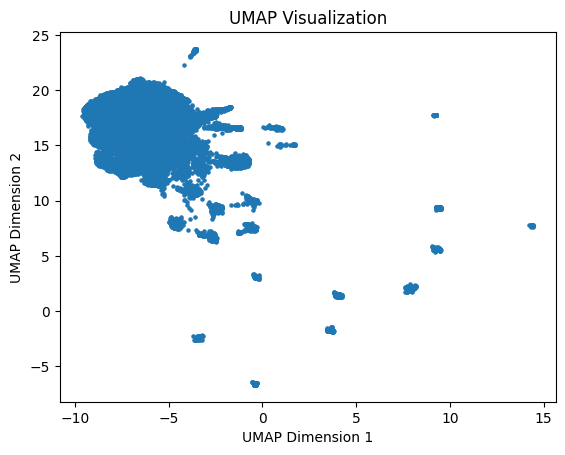

In [9]:
import matplotlib.pyplot as plt
# Assuming X_2d is your 2D embedding
plt.scatter(X_2d_1[:, 0], X_2d_1[:, 1], marker='o', s=5, cmap='viridis')

# Add labels and title if needed
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization')

# Show the plot
plt.show()

In [10]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

data = X_2d_1.copy()

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Fit the DBSCAN model
dbscan.fit(data)

DBSCAN()

In [12]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=300).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.2f}")

Estimated number of clusters: 5
Estimated number of noise points: 954
Silhouette Coefficient: 0.71


In [13]:
import numpy as np

# Find unique labels
unique_labels = np.unique(labels)

# Count the number of data points in each cluster
for label in unique_labels:
    if label == -1:
        # Skip noise points
        continue
    # Create a boolean mask for the current cluster
    cluster_mask = (labels == label)
    # Count the number of data points in the cluster
    num_points = np.sum(cluster_mask)
    print(f"Cluster {label}: {num_points} data points")

Cluster 0: 49211 data points
Cluster 1: 639 data points
Cluster 2: 861 data points
Cluster 3: 502 data points
Cluster 4: 453 data points


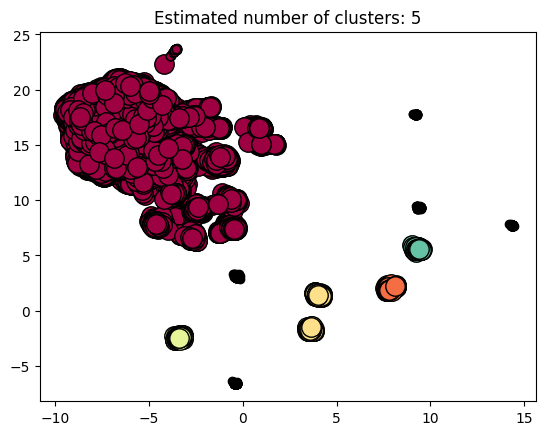

In [14]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Save ไฟล์

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming you have your data and data_scale ready

# Perform DBSCAN clustering
db = DBSCAN(eps=3, min_samples=300).fit(data)
labels = db.labels_

In [16]:
#ข้อมูลที่ scale
# Create a DataFrame from the labels obtained from DBSCAN
labels_df = pd.DataFrame(labels, columns=['labels'])

# Add the 'labels' column to the scaled data
data_dbscan_scale = pd.concat([data_scale, labels_df], axis=1)
data_dbscan_scale

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex,labels
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,0.321723,3.686025,-1.158713,0,1,0,1,0,1,0
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,0.983545,1.640595,-1.258996,0,1,0,1,0,1,0
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,0.494372,1.011232,-0.988847,0,1,0,1,0,1,0
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,0.782121,1.876606,-0.884842,0,1,0,1,0,1,0
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.494372,0.617880,-1.026662,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.327380,1.394314,1.359609,0.420244,-0.119286,3.360578,1.625099,-0.129510,-0.176477,-0.333859,...,-0.800496,-0.719516,0.741185,0,1,0,1,0,0,0
52616,0.359523,0.359444,-0.163391,-1.400558,-0.525000,-0.327810,1.625099,-0.129510,-0.176477,-0.333859,...,-0.829271,-0.798187,4.091990,0,1,0,1,0,1,0
52617,-0.069792,-0.227283,0.262439,1.200588,-0.351123,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,...,-1.375994,-1.506220,0.277258,0,0,1,1,0,0,0
52618,0.016071,-0.624476,-0.241369,0.853769,0.054591,-0.327810,-0.698699,-0.129510,-0.176477,-0.333859,...,0.713925,1.196108,-1.051435,0,1,0,1,0,0,0


In [51]:
#save file data
data_dbscan_scale .to_csv('/content/drive/MyDrive/ckd/data_DBSCAN_scale_addeGFR.csv', index=False)

import ข้อมูล

In [6]:
import pandas as pd
data_dbscan_scale= pd.read_csv("/content/drive/MyDrive/ckd/data_DBSCAN_scale_addeGFR.csv")

In [9]:
#select columns
columns = ['Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR','L2-BUN','L3-Creatinine','L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio','Slopes']
columns = df[columns]
columns

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Slopes
0,73,20.8000,1.3900,75.0,127.0,90,0,0,0,0,...,4.9248,194.24,91.00,5.284,215.00,81.00,123.00,99.00,21.019,-7.158596
1,74,20.2700,1.3800,64.0,105.0,90,90,0,0,0,...,5.1634,251.46,86.00,5.755,219.00,64.00,146.00,73.00,15.198,5.550691
2,75,20.7200,1.3800,76.0,138.0,100,100,34,0,0,...,9.4100,313.00,100.00,5.300,193.00,62.00,129.00,65.00,30.879,-6.063710
3,76,20.2700,1.3600,66.0,134.0,35,0,1,35,0,...,4.3718,204.65,89.00,5.562,205.00,69.00,139.00,76.00,36.916,-12.812245
4,78,19.0500,1.3300,57.0,103.0,100,0,15,0,0,...,5.4200,434.00,88.00,5.500,198.00,74.00,129.00,60.00,28.684,28.287500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,63,29.7500,1.8800,78.0,134.0,100,100,0,0,0,...,10.3200,306.00,103.00,5.900,165.00,311.00,84.00,43.00,131.300,-4.256753
52616,71,25.9700,1.6300,57.0,127.0,0,100,0,0,0,...,9.5600,361.00,99.00,7.100,154.00,196.00,83.00,42.00,325.800,-0.692078
52617,66,23.8269,1.6999,87.0,130.0,0,0,0,0,0,...,4.6100,131.00,123.99,6.457,112.00,96.00,64.00,33.00,104.371,7.217875
52618,67,22.3761,1.6172,83.0,137.0,0,0,0,0,0,...,9.4400,305.00,96.00,5.715,202.31,93.29,136.63,67.35,27.246,-32.794557


In [10]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope < -5:
        return '1'#'rapid'
    elif -5 <= slope <= -0.75:
        return '2'#'prevention'
    else:
        return '3'#normal'

columns['group'] = columns['Slopes'].apply(categorize_slope)

<ipython-input-10-c05b350d42a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns['group'] = columns['Slopes'].apply(categorize_slope)


In [11]:
columns

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Slopes,group
0,73,20.8000,1.3900,75.0,127.0,90,0,0,0,0,...,194.24,91.00,5.284,215.00,81.00,123.00,99.00,21.019,-7.158596,1
1,74,20.2700,1.3800,64.0,105.0,90,90,0,0,0,...,251.46,86.00,5.755,219.00,64.00,146.00,73.00,15.198,5.550691,3
2,75,20.7200,1.3800,76.0,138.0,100,100,34,0,0,...,313.00,100.00,5.300,193.00,62.00,129.00,65.00,30.879,-6.063710,1
3,76,20.2700,1.3600,66.0,134.0,35,0,1,35,0,...,204.65,89.00,5.562,205.00,69.00,139.00,76.00,36.916,-12.812245,1
4,78,19.0500,1.3300,57.0,103.0,100,0,15,0,0,...,434.00,88.00,5.500,198.00,74.00,129.00,60.00,28.684,28.287500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,63,29.7500,1.8800,78.0,134.0,100,100,0,0,0,...,306.00,103.00,5.900,165.00,311.00,84.00,43.00,131.300,-4.256753,2
52616,71,25.9700,1.6300,57.0,127.0,0,100,0,0,0,...,361.00,99.00,7.100,154.00,196.00,83.00,42.00,325.800,-0.692078,3
52617,66,23.8269,1.6999,87.0,130.0,0,0,0,0,0,...,131.00,123.99,6.457,112.00,96.00,64.00,33.00,104.371,7.217875,3
52618,67,22.3761,1.6172,83.0,137.0,0,0,0,0,0,...,305.00,96.00,5.715,202.31,93.29,136.63,67.35,27.246,-32.794557,1


In [12]:
columns.drop('Slopes', axis=1, inplace=True)

<ipython-input-12-03147444bfbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns.drop('Slopes', axis=1, inplace=True)


In [13]:
columns

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,group
0,73,20.8000,1.3900,75.0,127.0,90,0,0,0,0,...,4.9248,194.24,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1
1,74,20.2700,1.3800,64.0,105.0,90,90,0,0,0,...,5.1634,251.46,86.00,5.755,219.00,64.00,146.00,73.00,15.198,3
2,75,20.7200,1.3800,76.0,138.0,100,100,34,0,0,...,9.4100,313.00,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1
3,76,20.2700,1.3600,66.0,134.0,35,0,1,35,0,...,4.3718,204.65,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1
4,78,19.0500,1.3300,57.0,103.0,100,0,15,0,0,...,5.4200,434.00,88.00,5.500,198.00,74.00,129.00,60.00,28.684,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,63,29.7500,1.8800,78.0,134.0,100,100,0,0,0,...,10.3200,306.00,103.00,5.900,165.00,311.00,84.00,43.00,131.300,2
52616,71,25.9700,1.6300,57.0,127.0,0,100,0,0,0,...,9.5600,361.00,99.00,7.100,154.00,196.00,83.00,42.00,325.800,3
52617,66,23.8269,1.6999,87.0,130.0,0,0,0,0,0,...,4.6100,131.00,123.99,6.457,112.00,96.00,64.00,33.00,104.371,3
52618,67,22.3761,1.6172,83.0,137.0,0,0,0,0,0,...,9.4400,305.00,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1


In [18]:
from sklearn.preprocessing import StandardScaler

# สร้างอินสแตนซ์ของ StandardScaler
scaler = StandardScaler()

# ทำการสเกลข้อมูลในคอลัมน์ที่ไม่รวมคอลัมน์ 'group'
columns_scaled = scaler.fit_transform(columns.drop(columns=['group']))

# สร้าง DataFrame จากข้อมูลที่สเกลแล้ว พร้อมกับกำหนดชื่อคอลัมน์
columns_scaled_df = pd.DataFrame(columns_scaled, columns=columns.columns.drop('group'))

# เพิ่มคอลัมน์ 'group' เข้าไปใน DataFrame ที่สเกลแล้ว
data = pd.concat([columns_scaled_df, columns['group']], axis=1)

# เพิ่มคอลัมน์ 'InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex'
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex']]

# รวม DataFrame ข้อมูลที่สเกลแล้วและคอลัมน์เพิ่มเติม
final_data = pd.concat([data, additional_columns], axis=1)



In [ ]:
# นำคอลัมน์ 'group' จากข้อมูล columns มาเพิ่มใน data_dbscan_scale
data_dbscan_scale['group'] = columns['group']

In [30]:
# Assuming you want to select rows where the 'labels' column equals 1
data_labels_1 = data_dbscan_scale[data_dbscan_scale['labels'] == 1]
data_labels_1

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex,labels,group
24,1.905055,-0.181125,0.516476,0.333539,0.808061,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,0.292185,-0.895455,1,0,0,1,0,0,1,1
43,1.046426,-1.463898,-1.503632,-2.094198,0.344387,-0.32781,1.625099,-0.12951,-0.176477,3.433168,...,0.460539,0.801810,0,1,0,1,0,1,1,3
44,1.132289,-1.532342,-1.564552,-2.354312,0.228469,-0.32781,1.625099,-0.12951,-0.176477,3.433168,...,0.067187,-0.689341,0,1,0,1,0,1,1,3
60,1.475740,-0.736998,-1.201468,-1.053739,-0.756837,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,1.308606,-1.051711,0,1,0,1,0,1,1,3
210,0.960563,-0.522112,-1.625472,-2.007493,-0.930715,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,-0.490586,-0.090366,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52406,-0.413243,1.747484,-0.224311,0.420244,1.039897,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,0.732739,0.808443,0,1,0,1,0,1,1,3
52432,-1.357735,-1.639114,-0.955352,0.680359,0.750102,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,2.348629,1.564364,0,1,0,1,0,1,1,2
52440,0.874700,-1.702083,-0.407071,1.287293,1.271734,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,0.617880,-0.338842,0,1,0,1,0,0,1,1
52460,-0.928421,-0.086809,-0.407071,0.853769,-0.119286,-0.32781,-0.698699,-0.12951,-0.176477,-0.333859,...,2.033947,-0.811039,0,1,0,1,0,1,1,1


In [68]:
#data_dbscan_scale.drop('labels', axis=1, inplace=True)

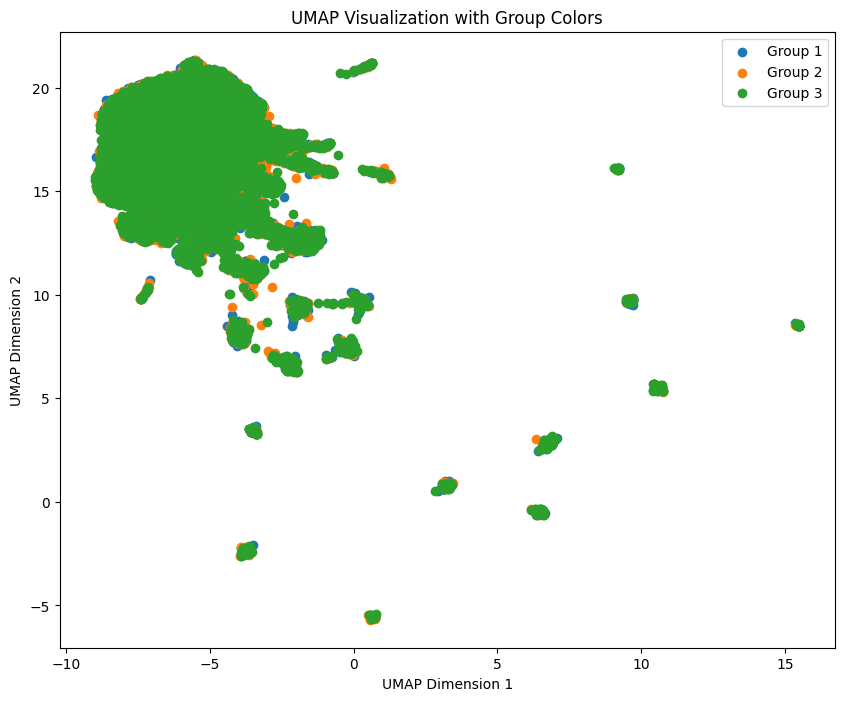

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_2d_1 is your UMAP data and labels is the clustering result
# Plot the clustered data with colors based on the 'group' column
plt.figure(figsize=(10, 8))
for group in np.unique(data_dbscan_scale['group']):
    plt.scatter(X_2d_1[data_dbscan_scale['group'] == group, 0],
                X_2d_1[data_dbscan_scale['group'] == group, 1],
                label=f'Group {group}')

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization with Group Colors')
plt.legend()
plt.show()
